In [13]:
import crystal_toolkit
import os
from pymatgen.core import Structure, Element
from pymatgen.transformations.standard_transformations import SubstitutionTransformation
import matcalc
from matcalc import PhononCalc

In [14]:
ZFO_expt = Structure.from_file(
    os.path.join("structures", "Zn(FeO2)2_fd3m.cif")
)
print(ZFO_expt)
ZFO_expt

Full Formula (Zn8 Fe16 O32)
Reduced Formula: Zn(FeO2)2
abc   :   8.435505   8.435505   8.435505
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (56)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Zn2+  0         0         0.5
  1  Zn2+  0.25      0.25      0.75
  2  Zn2+  0         0.5       0
  3  Zn2+  0.75      0.25      0.25
  4  Zn2+  0.25      0.75      0.25
  5  Zn2+  0.75      0.75      0.75
  6  Zn2+  0.5       0         0
  7  Zn2+  0.5       0.5       0.5
  8  Fe3+  0.125     0.125     0.125
  9  Fe3+  0.125     0.375     0.375
 10  Fe3+  0.875     0.375     0.625
 11  Fe3+  0.875     0.125     0.875
 12  Fe3+  0.125     0.875     0.875
 13  Fe3+  0.125     0.625     0.625
 14  Fe3+  0.875     0.625     0.375
 15  Fe3+  0.875     0.875     0.125
 16  Fe3+  0.375     0.125     0.375
 17  Fe3+  0.625     0.875     0.375
 18  Fe3+  0.625     0.125     0.625
 19  Fe3+  0.375     0.875     0.625
 20  Fe

In [15]:
calculator_pbe = matcalc.load_fp("pbe")

In [17]:
phonon_calc = PhononCalc(
    calculator_pbe,
    relax_structure=True,
    write_band_structure="output/ZFO_phonon_bs.yaml",
    write_total_dos="output/ZFO_phonon_dos.dat",
    write_phonon="output/ZFO_phonon.yaml",
    optimizer="FIRE",
)

data_ZFO = phonon_calc.calc(ZFO_expt)

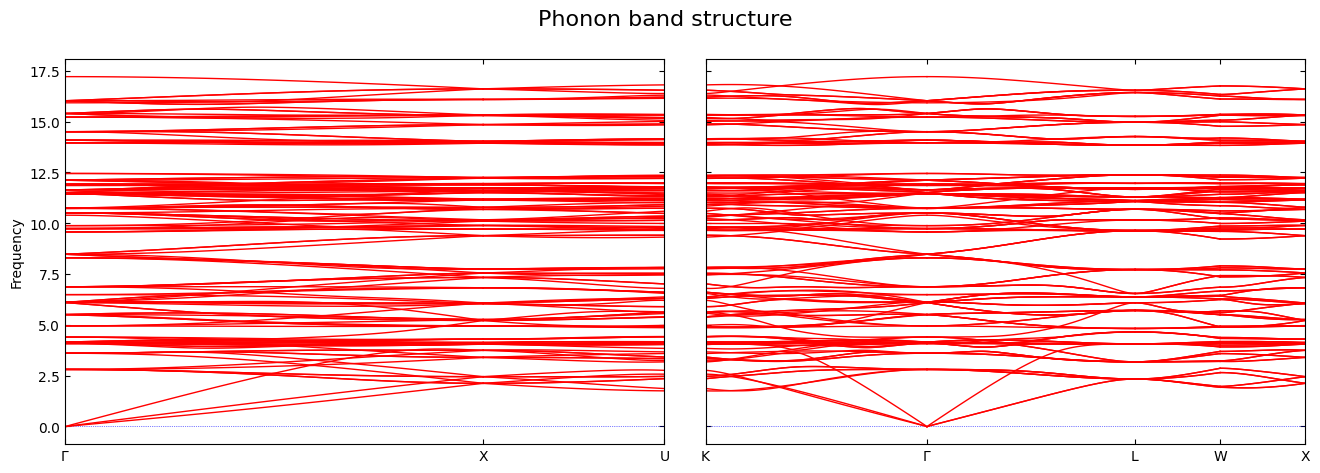

In [18]:
import matplotlib.pyplot as plt

phonon_bs = data_ZFO['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


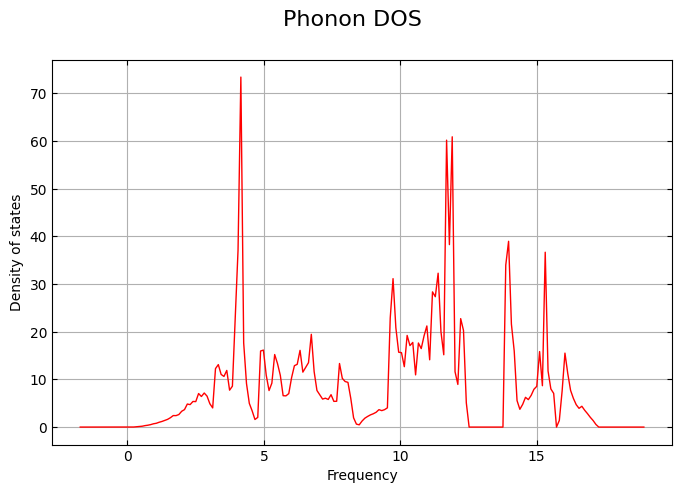

In [19]:
phonon_dos = data_ZFO["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

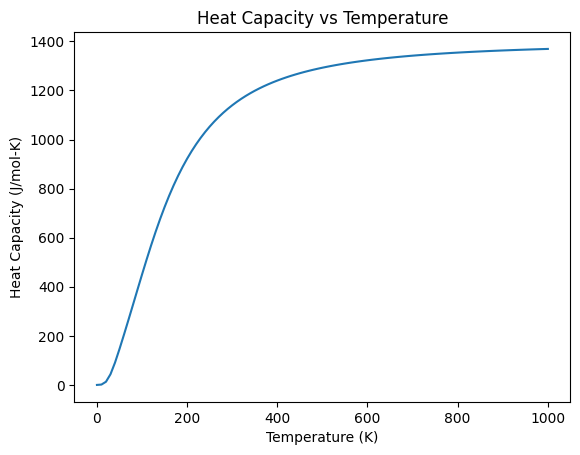

In [20]:
plt.plot(
    data_ZFO['thermal_properties']['temperatures'],
    data_ZFO['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()

In [ ]:
# dope with Mn

# Map of substitution: {original_element: dopant_element}
substitution = { "Zn": "Mn" }

# Create the transformation
trans = SubstitutionTransformation(substitution)


In [22]:
from pymatgen.transformations.advanced_transformations import EnumerateStructureTransformation

# Replace 1 out of 16 Fe atoms (~6.25%)
enum_trans = EnumerateStructureTransformation(max_sites_substituted=1)
enum_structs = enum_trans.apply_transformation(ZFO_expt)

# Now manually replace Fe -> La in one site
doped_structure = enum_structs[0].copy()
doped_structure[doped_structure.species.index("Fe")] = "La"


TypeError: EnumerateStructureTransformation.__init__() got an unexpected keyword argument 'max_sites_substituted'